# 28 Nov 23 - Activity: Model of Two Bodies in Thermal Contact

We've developed an equation for the number of ways we can arrange a small amount of quanta on a small number of oscillators. The formula we developed for arranging $q$ on $N$ oscillators is given below:

$$\Omega = \dfrac{(q+N-1)!}{q!(N-1)!}$$

These calculations are only tractable with pencil and paper when the number of quanta and oscillators is low. For even a few hundred oscillators and quanta the calculations can only be done on a computer. In fact, we will see with this model how we can easily blow out our computational tools as well.

## Microstates and Macrostates

Remember that a particular arrangement of quanta on oscillators is a microstate. That is, atom 1 has 3 oscillators with 1 quanta each on oscillator 1 and oscillator 2. But another microstate with quanta each on oscillator 2 and 3 would be the same energy macrostate for atom 1. We typically use energy for our marker for macrostates, but this doesn't have to be the case because micro and macrostate ideas apply well beyond thermal physics to information theory, data science, networks, and general probability theory.

## The setup

Consider two blocks of material made of simple atomic oscillators that can take on quanta of energy. One block has 200 such atoms, and the other block has 300 such atoms. There are 400 quanta of energy that can be distributed between the two. 

Before we computed the number of ways for a pair of systems, showing that multiplying the ways was how to find the total number. Here we consider the number of total atoms as given, so the number of ways is a function of the number of energy quanta distributed on atom 1 ($q_1$) and the total available ($q_{tot}$).

$$\Omega_T(q_{tot},q_1) = \Omega_1(q_1)*\Omega_2(q_{tot}-q_1)$$

Your goal is to compute the number of total ways to distribute $q_1$ quanta given $q_{tot}$ available and plotting the distribution $\Omega_T$ as a function of $q_1$.

Some steps:

* Write a function that computes the number of ways given a $q$ and $N$
* Test that function on small $q$ and $N$ that we've used
* Write a function that calls the above one but sweeps through the number of quanta $q$
* Show you can reproduce the small distribution that we did by hand
* Plot the distribution of number of ways for the 200/300 oscillator setup with 400 quanta
* Try to break your code by increasing these numbers.

In [5]:
## your code here
import numpy as np
import matplotlib.pyplot as plt

def num_combo(N, q):
    return np.math.factorial(q+N-1)/(np.math.factorial(q)*np.math.factorial(N-1))

num_combo(3, 4)

15.0

In [6]:
qtot = 400
omega1_list = []
omega2_list = []
omega = []
for q1 in range(0, qtot+1):
    q2 = qtot - q1
    omega1 = num_combo(200, q1)
    omega2 = num_combo(300, q2)
    omega.append(omega1*omega2)
    omega1_list.append(omega1)
    omega2_list.append(omega2)
    



Text(0.5, 1.0, 'Number of states')

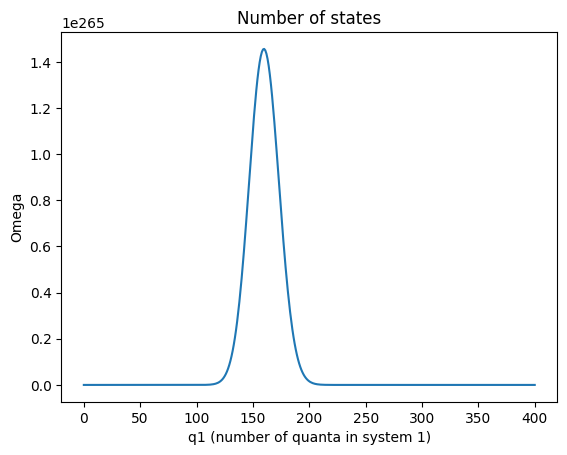

In [7]:
plt.plot(omega)
plt.xlabel('q1 (number of quanta in system 1)')
plt.ylabel('Omega')
plt.title("Number of states")
# plt.yscale('log')

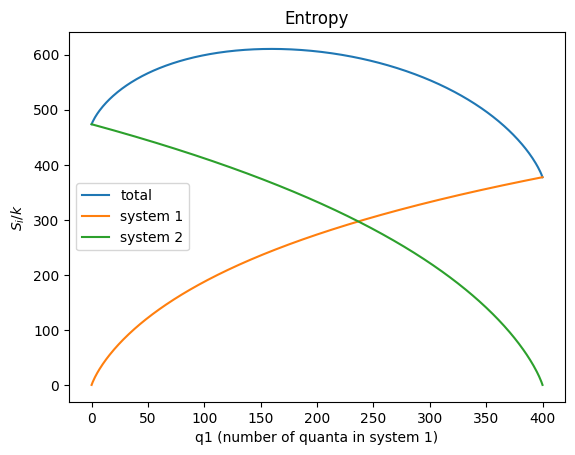

In [8]:
plt.plot(np.log(omega), label='total')
plt.plot(np.log(omega1_list), label='system 1')
plt.plot(np.log(omega2_list), label='system 2')


plt.xlabel('q1 (number of quanta in system 1)')
plt.ylabel('$S_i/k$')
plt.title("Entropy")
plt.legend()


In [9]:
def find_series(N, M):
    # Generate all combinations of N non-negative integers that add up to M
    combinations = np.array(np.meshgrid(*[np.arange(M + 1)] * N)).T.reshape(-1, N)

    # Filter combinations that sum up to M
    valid_combinations = combinations[combinations.sum(axis=1) == M]

    return valid_combinations


In [10]:
qtot = 100
N1 = 50
N2 = 100
N3 = 150
N4 = 200
omega1_list = []
omega2_list = []
omega3_list = []
omega4_list = []

omega_total = []
all_qs = find_series(4, qtot)
for qs in all_qs:        
    omega1 = num_combo(N1, qs[0])
    omega2 = num_combo(N2, qs[1])
    omega3 = num_combo(N3, qs[2])
    omega4 = num_combo(N4, qs[3])
    omega_total.append(omega1*omega2*omega3*omega4)
    omega1_list.append(omega1)
    omega2_list.append(omega2)
    omega3_list.append(omega3)
    omega4_list.append(omega4)

    



In [12]:
#find the q1, q2, q3, q4 that maximizes omega
max_omega = np.argmax(omega_total)
print(all_qs[max_omega])

[10 20 30 40]


In [14]:
# Check answer
N1 = 50
N2 = 100
N3 = 150
N4 = 200
N = N1 + N2 + N3 + N4
np.array([N1/N, N2/N, N3/N, N4/N])*qtot

array([10., 20., 30., 40.])